In [2]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Subset
import sys
import os

sys.path.append(os.path.abspath('..')) #so we can import for the dir above
from combined_data_script import get_data
from medication_data_script import LeakageOption
from SimpleCNN import SimpleCNN
from utils import train_loop, eval_loop

We dont train model00 because it would have a no changes to the weights in the criterion so its the same as the best model from week03 dir: 00_no_movment

**train model01** (the one with augmentd criterion)

In [3]:
data_dic = get_data(flatten=False,leakage_option=LeakageOption.FULL_LEAKAGE, stride=50, filter_static=False)
train, dev, test = data_dic['train'], data_dic['dev'], data_dic['test'] 
len(train), len(dev), len(test) #note it is NOT shuffled we will nedd to do this 

(10426, 1302, 1306)

In [5]:

#important that we shuffle THEY ARE NOT IF WE DONT
torch.manual_seed(69)
train_loader = DataLoader(train, batch_size=64, shuffle=True)
dev_loader = DataLoader(dev, batch_size=2048, shuffle=True)

dropout = 0.75
model = SimpleCNN(dropout=dropout)

device = "cuda:0"
model = model.to(device)

pos_weight_tensor = torch.tensor([0.9]).to(device)
criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight_tensor)
optimizer =  torch.optim.AdamW(model.parameters(), lr=0.003, weight_decay=0.05)

100%|██████████| 100/100 [00:40<00:00,  2.49it/s]

best dev loss is 0.2292


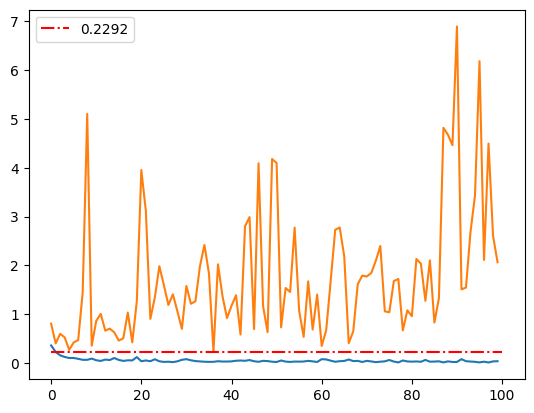

In [6]:
best_model = train_loop(model, device, optimizer, criterion, train_loader, dev_loader, dropout=dropout, epochs=100)

torch.Size([1302, 6, 400])
              precision    recall  f1-score   support

           0       0.92      0.93      0.92       651
           1       0.93      0.92      0.92       651

    accuracy                           0.92      1302
   macro avg       0.92      0.92      0.92      1302
weighted avg       0.92      0.92      0.92      1302



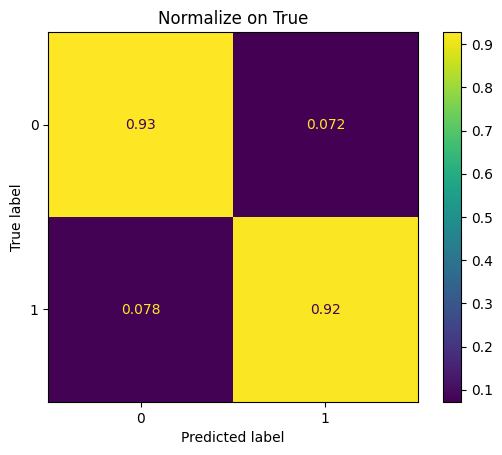

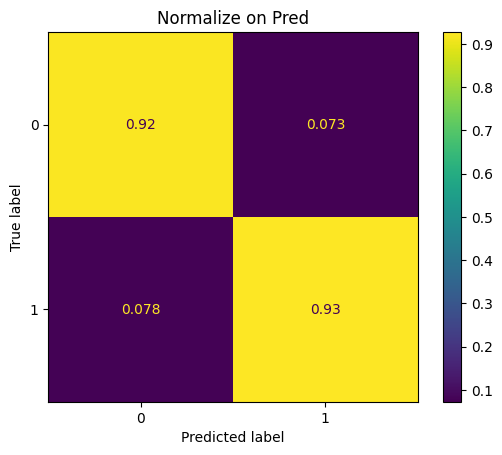

In [7]:
X, y = next(iter(dev_loader))
print(X.shape)
eval_loop(best_model, X, y)

In [ ]:
# torch.save(best_model.state_dict(), '94f1_ACIDENTALSAVEAugmented_loss_weights_simpcnn.pth') 

SO THAT MODEL DID TH BEST yet but now lets try again but do .8 insted of .9

In [9]:

#important that we shuffle THEY ARE NOT IF WE DONT
torch.manual_seed(69)
train_loader = DataLoader(train, batch_size=64, shuffle=True)
dev_loader = DataLoader(dev, batch_size=2048, shuffle=True)

dropout = 0.75
model = SimpleCNN(dropout=dropout)

device = "cuda:0"
model = model.to(device)

pos_weight_tensor = torch.tensor([0.8]).to(device)
criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight_tensor)
optimizer =  torch.optim.AdamW(model.parameters(), lr=0.003, weight_decay=0.05)

100%|██████████| 100/100 [00:40<00:00,  2.50it/s]

best dev loss is 0.1881


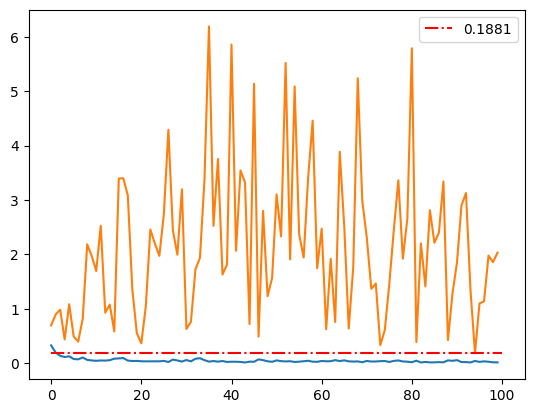

In [10]:
best_model = train_loop(model, device, optimizer, criterion, train_loader, dev_loader, dropout=dropout, epochs=100)

torch.Size([1302, 6, 400])


              precision    recall  f1-score   support

           0       0.93      0.92      0.93       651
           1       0.92      0.93      0.93       651

    accuracy                           0.93      1302
   macro avg       0.93      0.93      0.93      1302
weighted avg       0.93      0.93      0.93      1302



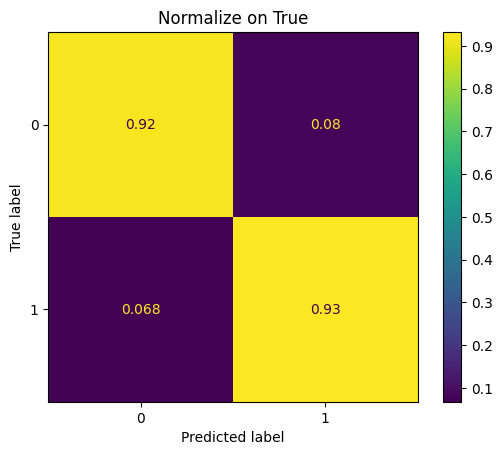

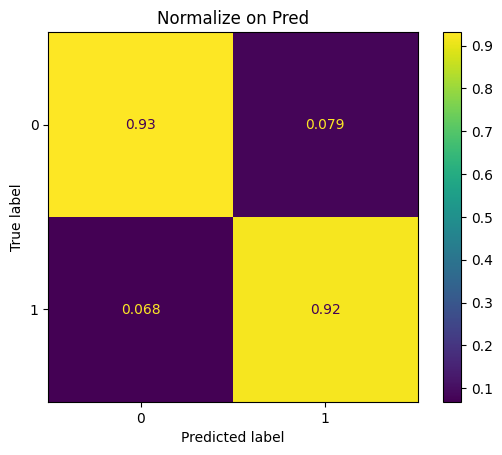

In [11]:
X, y = next(iter(dev_loader))
print(X.shape)
eval_loop(best_model, X, y)